In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [306]:
trans=pd.read_excel('QVI_transaction_data.xlsx')

In [307]:
trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2018-10-18,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2018-10-19,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-10-20,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-10-21,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [308]:
trans['PROD_PRICE']=trans['TOT_SALES']/trans['PROD_QTY']
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,2018-10-18,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,2018-10-19,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,2018-10-20,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00
4,2018-10-21,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60


In [309]:
trans['DATE']=pd.to_datetime(trans['DATE'])

In [310]:
trans['Year']=trans['DATE'].dt.year
trans['Month']=trans['DATE'].dt.month_name()

In [311]:
trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE,Year,Month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,2018,October
1,2018-10-18,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10,2018,October
2,2018-10-19,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,2018,October
3,2018-10-20,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00,2018,October
4,2018-10-21,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60,2018,October
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.40,2019,March
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,4.40,2018,August
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,4.40,2018,November
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,3.90,2018,December


In [312]:
#Drooping irrelavant columns to the analysis
trans=trans.drop(['LYLTY_CARD_NBR','TXN_ID','PROD_NBR','STORE_NBR'],axis=1)

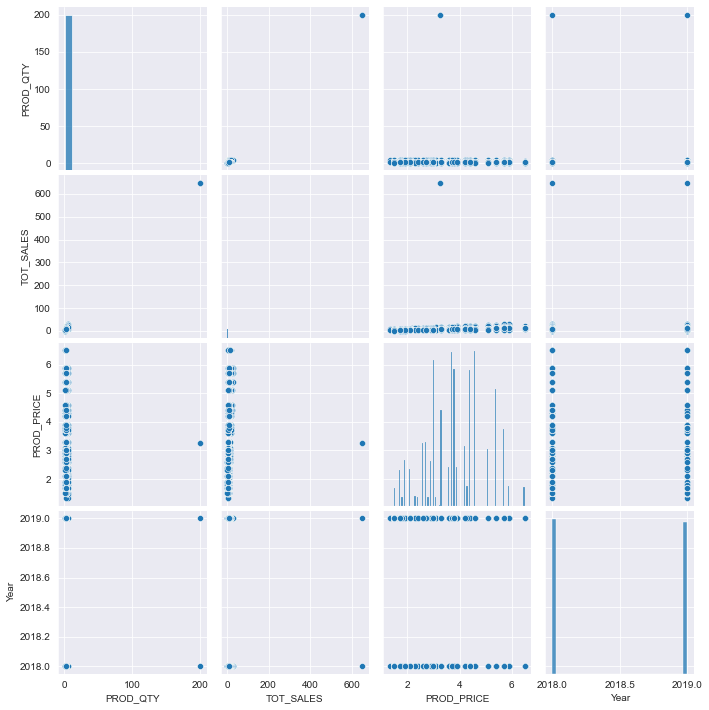

In [313]:
sns.pairplot(trans)

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_PRICE'>

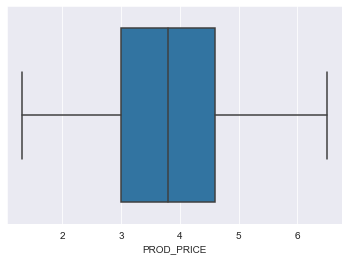

In [314]:
sns.boxplot(trans['PROD_PRICE'])

In [315]:
#Outliers exist at total sales which could be as a result of product quantity as prices are in similar range
trans.describe()

,PROD_QTY,TOT_SALES,PROD_PRICE,Year
count,264836.000000,264836.000000,264836.000000,264836.000000
mean,1.907309,7.304200,3.824624,2018.495178
std,0.643654,3.083226,1.109523,0.499978
min,1.000000,1.500000,1.320000,2018.000000
25%,2.000000,5.400000,3.000000,2018.000000
50%,2.000000,7.400000,3.800000,2018.000000
75%,2.000000,9.200000,4.600000,2019.000000
max,200.000000,650.000000,6.500000,2019.000000


C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

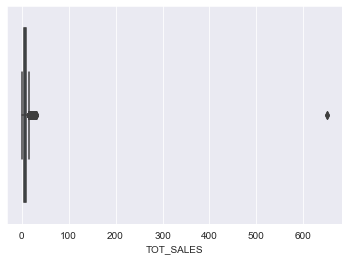

In [316]:
#Outliers exist
sns.boxplot(trans['TOT_SALES'])

In [317]:
trans[trans['PROD_QTY']==200]

,DATE,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE,Year,Month
69762,2018-08-19,Dorito Corn Chp Supreme 380g,200,650.0,3.25,2018,August
69763,2019-05-20,Dorito Corn Chp Supreme 380g,200,650.0,3.25,2019,May


In [318]:
#Dropping particular rows (outliers)
trans=trans.drop(trans[trans.PROD_QTY==200].index)

In [319]:
#Outliers removed from product quantity
trans['PROD_QTY'].max()

5

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

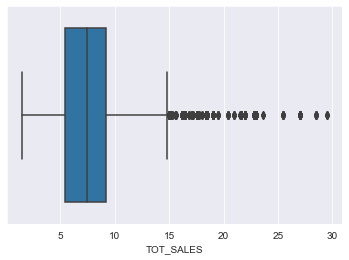

In [320]:
#Much better than before
sns.boxplot(trans['TOT_SALES'])

In [326]:
#Product price and product quantity are in the same range, so total sales will also be on the same range, no outliers
trans.describe()

,PROD_QTY,TOT_SALES,PROD_PRICE,Year
count,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.905813,7.299346,3.824629,2018.495178
std,0.343436,2.527241,1.109526,0.499978
min,1.000000,1.500000,1.320000,2018.000000
25%,2.000000,5.400000,3.000000,2018.000000
50%,2.000000,7.400000,3.800000,2018.000000
75%,2.000000,9.200000,4.600000,2019.000000
max,5.000000,29.500000,6.500000,2019.000000


In [335]:
#Dataset not affected by high skewness
trans.skew()

PROD_QTY     -0.253032
TOT_SALES     0.313155
PROD_PRICE    0.065445
Year          0.019289
dtype: float64

In [336]:
#No null value
trans.isnull().sum()

DATE          0
PROD_NAME     0
PROD_QTY      0
TOT_SALES     0
PROD_PRICE    0
Year          0
Month         0
dtype: int64

# Analysing Transaction Dataset

In [337]:
#Sorting transaction data on the basis on product price
trans.sort_values('PROD_PRICE', ascending=False)

,DATE,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE,Year,Month
179841,2019-03-08,Dorito Corn Chp Supreme 380g,2,13.0,6.50,2019,March
96755,2018-10-25,Dorito Corn Chp Supreme 380g,2,13.0,6.50,2018,October
150142,2019-03-02,Dorito Corn Chp Supreme 380g,2,13.0,6.50,2019,March
160737,2019-02-14,Dorito Corn Chp Supreme 380g,2,13.0,6.50,2019,February
96977,2018-09-21,Dorito Corn Chp Supreme 380g,2,13.0,6.50,2018,September
...,...,...,...,...,...,...,...
2,2018-10-19,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,2018,October
55195,2018-08-16,Grain Waves Sweet Chilli 210g,5,7.2,1.44,2018,August
203991,2018-08-18,Red Rock Deli Thai Chilli&Lime 150g,2,2.7,1.35,2018,August
16896,2019-05-19,RRD SR Slow Rst Pork Belly 150g,2,2.7,1.35,2019,May


In [338]:
#Sorting transaction data on the basis on total sales
trans.sort_values('TOT_SALES',ascending=False)

,DATE,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE,Year,Month
55558,2019-05-14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,5.9,2019,May
5179,2018-08-15,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,5.9,2018,August
117850,2019-05-19,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,5.9,2019,May
150683,2019-05-20,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,5.9,2019,May
184969,2019-05-20,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,5.9,2019,May
...,...,...,...,...,...,...,...
1387,2019-04-28,Woolworths Medium Salsa 300g,1,1.5,1.5,2019,April
262219,2018-11-22,Woolworths Mild Salsa 300g,1,1.5,1.5,2018,November
55725,2019-01-09,Woolworths Medium Salsa 300g,1,1.5,1.5,2019,January
194299,2019-05-24,Woolworths Medium Salsa 300g,1,1.5,1.5,2019,May


**Per transaction inference** In terms of highest price per chip brand we see that doritos tops the list but in case of sales per brand we see Smiths Crnkle Chip is the highest implying that based on our objective (Revenue Maximization) we should consider Smiths Crnkle (Also product qty is higher per buyer in Crnkle and the product price is not significantly lower than maximum product price.)

In [339]:
#SALES VOLUME
s=trans.groupby('PROD_NAME').count()
chip_VolofSales=s.sort_values('TOT_SALES', ascending=False).head(10)
chip_VolofSales

,DATE,PROD_QTY,TOT_SALES,PROD_PRICE,Year,Month
PROD_NAME,,,,,,
Kettle Mozzarella Basil & Pesto 175g,3304,3304,3304,3304,3304,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296,3296,3296,3296,3296,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269,3269,3269,3269,3269,3269
Tyrrells Crisps Ched & Chives 165g,3268,3268,3268,3268,3268,3268
Cobs Popd Sea Salt Chips 110g,3265,3265,3265,3265,3265,3265
Kettle 135g Swt Pot Sea Salt,3257,3257,3257,3257,3257,3257
Tostitos Splash Of Lime 175g,3252,3252,3252,3252,3252,3252
Infuzions Thai SweetChili PotatoMix 110g,3242,3242,3242,3242,3242,3242
Smiths Crnkle Chip Orgnl Big Bag 380g,3233,3233,3233,3233,3233,3233


**In terms of Volume** Top 10 chip brand in terms of volume of chips purchased doesnt have significant difference, can't exclusively focus on that.

Text(0.5, 1.0, 'Top 10 brand names based on Number of Chips Sold')

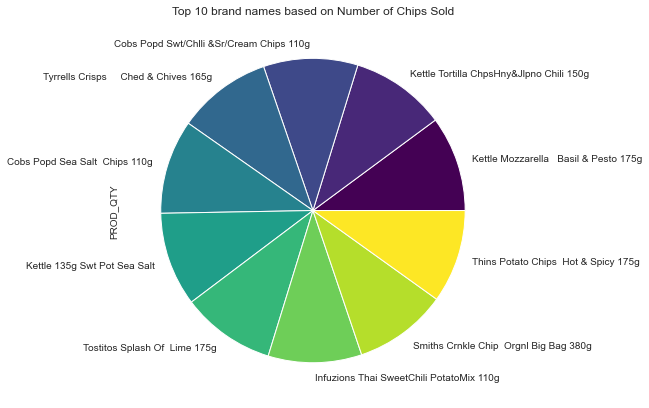

In [340]:
plt.figure(figsize=(10,7))
chip['PROD_QTY'].plot(kind='pie',colormap='viridis')
plt.title('Top 10 brand names based on Number of Chips Sold')

In [341]:
#Revenue Generated per Chip brand
ts=trans.groupby('PROD_NAME').sum()
ts
chipps_amountofSales=ts.sort_values('TOT_SALES', ascending=False)['TOT_SALES'].head(5)
chipps_amountofSales=pd.DataFrame(chipps_amountofSales)
chipps_amountofSales

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,39052.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
Kettle Mozzarella Basil & Pesto 175g,34457.4
Smiths Crinkle Original 330g,34302.6


Text(0.5, 1.0, 'Top 5 brand names based on Total Revenue Earned per brand')

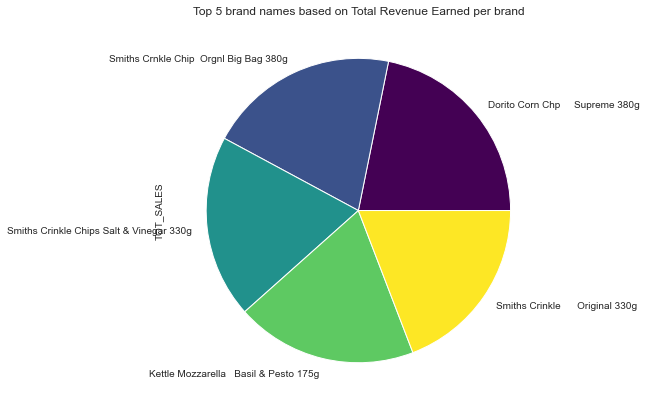

In [342]:
plt.figure(figsize=(10,7))
chipps_amountofSales['TOT_SALES'].plot(kind='pie',colormap='viridis')
plt.title('Top 5 brand names based on Total Revenue Earned per brand')

**Total Sales** Dorritos, Kettle and Smiths Crnkle amongst top 5 due to highest price per brand, highest purchases by customers per brand and highest revenue generated per transaction respectively.  

# Time Analysis

In [343]:
#Data divided into 2 different years
data_18=data[data['Year']==2018]
data_19=data[data['Year']==2019]

<AxesSubplot:xlabel='Month'>

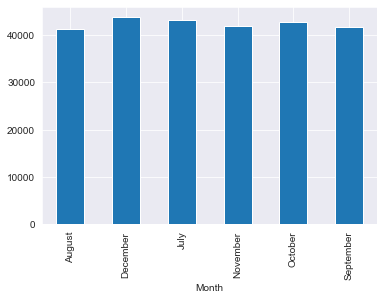

In [344]:
data_18.groupby('Month').sum()['PROD_QTY'].plot(kind='bar')

<AxesSubplot:xlabel='Month'>

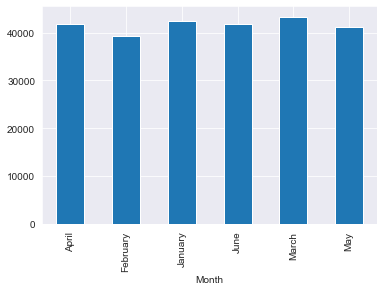

In [345]:
data_19.groupby('Month').sum()['PROD_QTY'].plot(kind='bar')

Not much significant difference in purchase dynamics on a month-wise basis

# Purchase Behaviour

In [346]:
purch_beh=pd.read_csv('QVI_purchase_behaviour.csv')

In [347]:
purch_beh.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [348]:
purch_beh=purch_beh.rename(columns={'LYLTY_CARD_NBR':'LYLTY_CARD_PURCH'})

In [349]:
purch_beh

,LYLTY_CARD_PURCH,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [350]:
purch_beh['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [351]:
#No null values
purch_beh.isnull().sum()

LYLTY_CARD_PURCH    0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [352]:
data= pd.concat([trans,purch_beh],axis=1)

In [353]:
data.head()

,DATE,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE,Year,Month,LYLTY_CARD_PURCH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,Natural Chip Compny SeaSalt175g,2.0,6.0,3.00,2018.0,October,1000.0,YOUNG SINGLES/COUPLES,Premium
1,2018-10-18,CCs Nacho Cheese 175g,3.0,6.3,2.10,2018.0,October,1002.0,YOUNG SINGLES/COUPLES,Mainstream
2,2018-10-19,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,1.45,2018.0,October,1003.0,YOUNG FAMILIES,Budget
3,2018-10-20,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,3.00,2018.0,October,1004.0,OLDER SINGLES/COUPLES,Mainstream
4,2018-10-21,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,4.60,2018.0,October,1005.0,MIDAGE SINGLES/COUPLES,Mainstream


<AxesSubplot:>

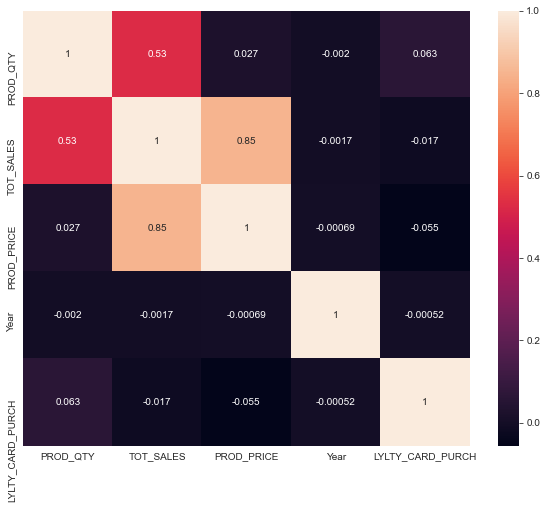

In [354]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

Total Sales is more correlated to product price than product quantity, should focus on analysing product price for driving sales growth

In [355]:
#Types of customer in our dataset buying chips
#t=data.groupby('PREMIUM_CUSTOMER').count()['PROD_QTY']
#t=pd.DataFrame(t)

In [356]:
data.groupby('PREMIUM_CUSTOMER').mean()['PROD_PRICE']

PREMIUM_CUSTOMER
Budget        3.789834
Mainstream    3.800563
Premium       3.787187
Name: PROD_PRICE, dtype: float64

In [357]:
data.groupby('LIFESTAGE').mean()['PROD_PRICE']

LIFESTAGE
MIDAGE SINGLES/COUPLES    3.792598
NEW FAMILIES              3.747901
OLDER FAMILIES            3.802817
OLDER SINGLES/COUPLES     3.794640
RETIREES                  3.789041
YOUNG FAMILIES            3.797799
YOUNG SINGLES/COUPLES     3.796198
Name: PROD_PRICE, dtype: float64

Average amount spent by each customer based on type and lifestage is more or less similar, no further analysis required.

# Types of Customers

<AxesSubplot:title={'center':'Number of chips bought by each segment'}, xlabel='PREMIUM_CUSTOMER'>

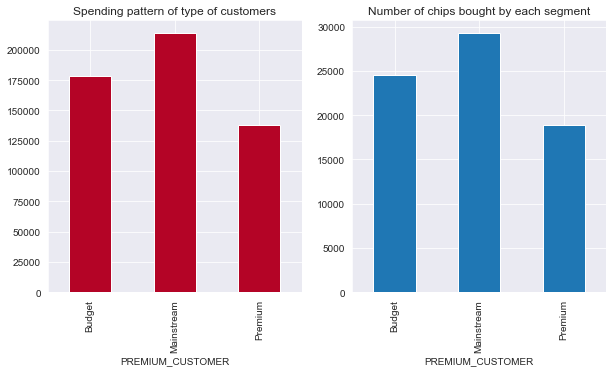

In [358]:
figure, axes = plt.subplots(1,2)
data.groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES'].plot(kind='bar',title='Spending pattern of type of customers',
                                                         figsize=(10,5),ax=axes[0],colormap='coolwarm_r')


data.groupby('PREMIUM_CUSTOMER').count()['PROD_QTY'].plot(kind='bar',title='Number of chips bought by each segment',
                                                          figsize=(10,5), ax=axes[1])

Based on Type of premium customers, it can be observed that based of volume of sales, mainstream customer lead the segment followed by budget and similar trend is reflected for spending patterns implying that in order to generate more sales, the store should focus on mainstream customers and their preferences.

# Customers based on Lifestage

In [359]:
#Expenditure by different kind of population to understand spending pattern of customers
Expenditure_lifestage=data.groupby('LIFESTAGE').sum()['TOT_SALES']
Expenditure_lifestage=pd.DataFrame(Expenditure_lifestage)
Expenditure_lifestage

,TOT_SALES
LIFESTAGE,
MIDAGE SINGLES/COUPLES,53060.95
NEW FAMILIES,18378.30
OLDER FAMILIES,71477.65
OLDER SINGLES/COUPLES,106682.40
RETIREES,107730.40
YOUNG FAMILIES,67189.90
YOUNG SINGLES/COUPLES,105346.75


In [360]:
NumberofChips_Lifestage=data.groupby('LIFESTAGE').count()['PROD_QTY']
NumberofChips_Lifestage=pd.DataFrame(NumberofChips_Lifestage)
NumberofChips_Lifestage

,PROD_QTY
LIFESTAGE,
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549
OLDER FAMILIES,9780
OLDER SINGLES/COUPLES,14609
RETIREES,14805
YOUNG FAMILIES,9177
YOUNG SINGLES/COUPLES,14440


array([<AxesSubplot:title={'center':'PROD_QTY'}, xlabel='LIFESTAGE'>],
      dtype=object)

<Figure size 720x720 with 0 Axes>

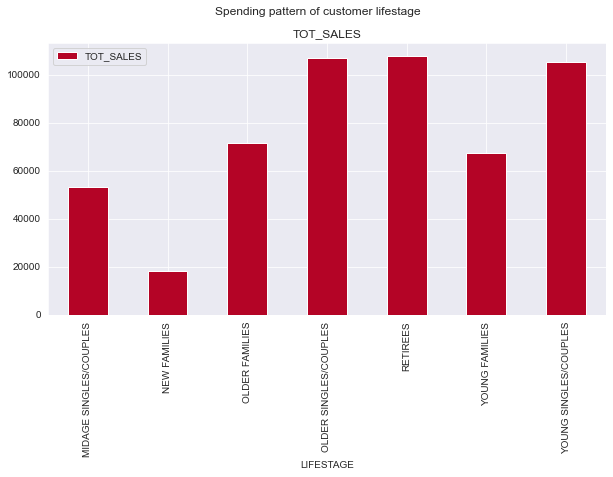

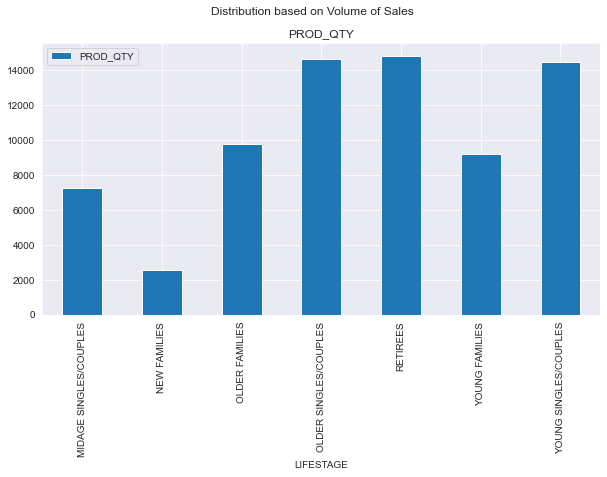

In [361]:
#figure, axes = plt.subplots(2,1)
plt.figure(figsize=(10,10))
Expenditure_lifestage.plot(kind='bar',title='Spending pattern of customer lifestage',figsize=(10,5),subplots=True,colormap='coolwarm_r')
NumberofChips_Lifestage.plot(kind='bar',title='Distribution based on Volume of Sales',figsize=(10,5),subplots=True)

In terms of volume of sales and value of sales, retirees lead the consumption of chips followed by singles (young/old) and couples. Consumption is driven by singles, couples and retirees.

# Testing for Statistically significant difference

In [362]:
import scipy.stats as stats

In [363]:
#Converting categorical variables into dummy variables to test for statistical significance
ddf=pd.get_dummies(data['PREMIUM_CUSTOMER'])
ddf

,Budget,Mainstream,Premium
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
264831,0,0,0
264832,0,0,0
264833,0,0,0
264834,0,0,0


In [364]:
dlf=pd.get_dummies(data['LIFESTAGE'])
dlf

,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
264831,0,0,0,0,0,0,0
264832,0,0,0,0,0,0,0
264833,0,0,0,0,0,0,0
264834,0,0,0,0,0,0,0


In [365]:
#Top 3 kind of customers are non signifcant, but significant difference can be observed between third and 4th kind.
fvalue, pvalue = stats.f_oneway(dlf['OLDER FAMILIES'],dlf['RETIREES'])
print(fvalue, pvalue)

1079.2576214263204 1.8451998532759102e-236


In [366]:
#Significant difference between different type of premium customers.
fvalue, pvalue = stats.f_oneway(ddf['Mainstream'],ddf['Premium'],ddf['Budget'])
print(fvalue, pvalue)

1217.0030807656588 0.0


Based on significant difference, our focus could be on Top 3 customers based on Lifestages and on mainstream customers.